### <center>Quadrature method for solving the second kind Fredholm equation

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

$\lambda = 1, ~K(x, s) = xs, ~f(x) = x, ~a = -1, ~b = 1$

In [2]:
def K(x, s):
    return x * s


def f(x):
    return x


def quadrature_method(K_func, f_func, x):
    n = len(x)
    h = (x[-1] - x[0]) / (n - 1)
    w = np.full(n, 1.0)
    w[0] = w[-1] = 1 / 2
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = -h * w[j] * K_func(x[i], x[j])
        A[i, i] += 1
        
    b = np.zeros(n)
    for i in range(n):
        b[i] = f_func(x[i])
    y = np.linalg.solve(A, b)
    return y

In [3]:
n = 100
a, b = -1, 1
x = np.linspace(a, b, n + 1)

In [4]:
solution = quadrature_method(K, f, x)
exact = 3 * x
discrepancy = abs(solution - exact)
print(f"Max_absolute_discrepancy: {discrepancy.max()}")

Max_absolute_discrepancy: 0.0012004801920775243


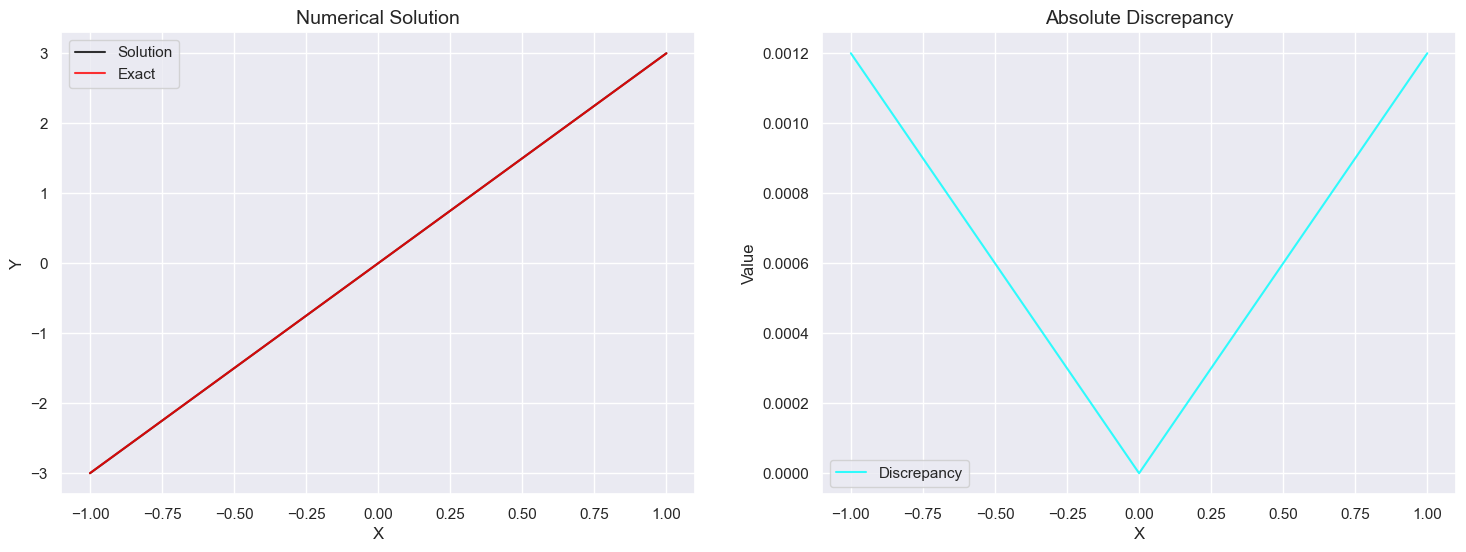

In [5]:
sns.set()

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(ax=axs[0], y=solution, x=x, label="Solution", alpha=0.8, c="black");
sns.lineplot(ax=axs[0], y=exact, x=x, label="Exact", alpha=0.8, c="red");
axs[0].set_xlabel("X", fontsize=12);
axs[0].set_ylabel("Y", fontsize=12);
axs[0].set_title("Numerical Solution", fontsize=14);
axs[0].legend();

sns.lineplot(ax=axs[1], y=discrepancy, x=x, label="Discrepancy", alpha=0.8, c="cyan");
axs[1].set_xlabel("X", fontsize=12);
axs[1].set_ylabel("Value", fontsize=12);
axs[1].set_title("Absolute Discrepancy", fontsize=14);
axs[1].legend();

plt.show()